# FP Growth - Apriori 



In [1]:
#Mete Mert Birdal - 21992866

## Library Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Reading the Data

I read the csv file into pandas dataframe.
Data has 3 main columns: Member_no, Date and item.

Member_no shows the user who carry out the transaction. <br>
Date shows on which date the transaction happened. <br>
item shows which item bought.

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Member_no,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
print("Length of Data:", len(df))

Length of Data: 38765


Here are some stats about dataframe:

In [5]:
df.describe()

,Member_no
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


## Data Preprocessing

Data has no NaN values. All rows are fits the format. There are no unnecessary columns or rows and we don't need new attributes. But there are some small problems in data and I fixed it with preprocessing: <br>

--> Column names are not orderly: Member_no -> Member No, item -> Item  <br> 
--> Some of rows are duplicated 

In [6]:
df = df.rename(columns={'Member_no': 'Member No', 'item': 'Item'})
df.head()

,Member No,Date,Item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


It is a code snippet for detecting duplicated rows.<br> I also throw them in the code behind this operation.

In [7]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Member No,Date,Item
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [8]:
df = df.drop_duplicates(ignore_index = True)
df

,Member No,Date,Item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38001,4471,08-10-2014,sliced cheese
38002,2022,23-02-2014,candy
38003,1097,16-04-2014,cake bar
38004,1510,03-12-2014,fruit/vegetable juice


As we can see again, there are no NaN values in our data.

In [9]:
df.isna().sum()

Member No    0
Date         0
Item         0
dtype: int64

## Data Visualization

For visualizing the data, I used another dataframe. Because working with another dataframe is more useful and you can change columns, create new features and show the data more effectively. <br> <br>
I splitted the Date to Day,Month,Year and create a feature named Weekday which shows the spesific day name as Monday, Tuesday etc.

You can see below, df_analize is ready to be shown by graphs.

In [10]:
df_analize = pd.read_csv('data.csv')
df_analize = df_analize.rename(columns={'Member_no': 'Member No', 'item': 'Item'})
df_analize['Date'] = pd.to_datetime(df_analize['Date'], errors='coerce')
df_analize['Day']= df_analize['Date'].dt.day
df_analize['Month']= df_analize['Date'].dt.month
df_analize['Year']= df_analize['Date'].dt.year
df_analize['Weekday'] = df_analize['Date'].dt.day_name()
df_analize = df_analize.drop('Date', axis=1)
df_analize.head()

,Member No,Item,Day,Month,Year,Weekday
0,1808,tropical fruit,21,7,2015,Tuesday
1,2552,whole milk,1,5,2015,Friday
2,2300,pip fruit,19,9,2015,Saturday
3,1187,other vegetables,12,12,2015,Saturday
4,3037,whole milk,2,1,2015,Friday


There are distributions of data shown by daily, monthly and weekdayly. 

Day Distribution --> We can see that day distribution is too messy, it's not right to comment <br> 
Month Distribution --> Maximum product purchase is on august while minimum purchase is on september <br> 
Weekday Distribution --> Thursday has been the most preferred day for product purchases

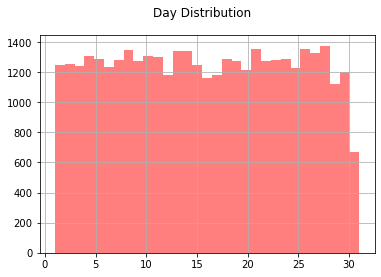

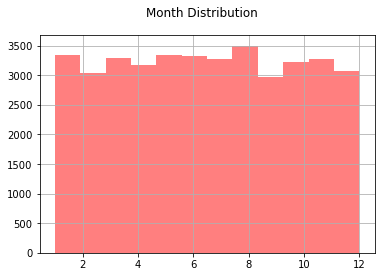

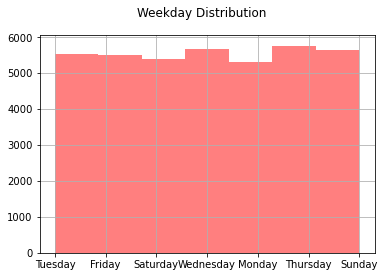

In [11]:
bins = [31,12,2,7]
for i in range(2,6):
    if i != 4:
        title = df_analize.columns[i] + " Distribution"
        fig=plt.figure()
        fig.suptitle(title)
        df_analize[df_analize.columns[i]].hist(color='r', alpha=0.5, bins=bins[i-2])

Here is boxplot graph of Month and Day.

[Text(0.5, 1.0, 'Month-Day Boxplot')]

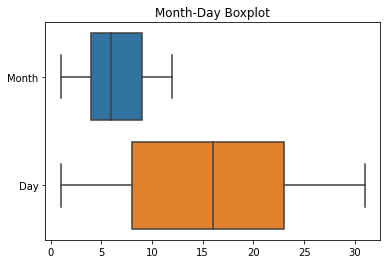

In [12]:
sns.boxplot(data=df_analize[["Month", "Day"]], orient="h").set(title= "Month-Day Boxplot")

In [13]:
most_purchased_items = list(df['Item'].value_counts()[0:5].keys())
most_purchased_items

['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt']

There are top 5 products has been purchased. Their histogram graph is given below.

[Text(0.5, 1.0, 'Most Purchased Items')]

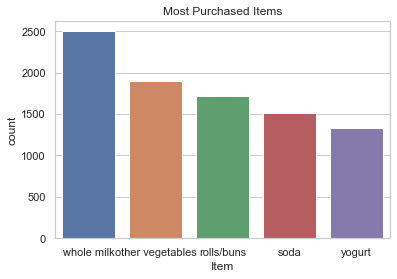

In [14]:
df_top1 = df_analize[df_analize['Item']==most_purchased_items[0]]
df_top2 = df_analize[df_analize['Item']==most_purchased_items[1]]
df_top3 = df_analize[df_analize['Item']==most_purchased_items[2]]
df_top4 = df_analize[df_analize['Item']==most_purchased_items[3]]
df_top5 = df_analize[df_analize['Item']==most_purchased_items[4]]
df_stat = pd.concat([df_top1,df_top2,df_top3,df_top4,df_top5])
sns.set_theme(style="whitegrid")
sns.countplot(x=df_stat['Item']).set(title= "Most Purchased Items")

## Preparing Data for Models

When I researched the data format for Apriori and FP-Growth algorithms, I saw that there are only product names as a list of lists. <br> 

I decided to travel into all rows with for loop and find transactions which is performed by same person and in same date. This code below, searches user and date together, when it finds match it stores the items into a list. After all this process our 'dataset' is ready to fit into mlxtend models. 

In [15]:
dataset = []
num_checked = []
for i in range(0,len(df)):
    product_list = []
    num = df['Member No'][i]
    date = df['Date'][i]
    if num not in num_checked:
        for t in range(0,len(df)):
            if df['Member No'][t] == num and df['Date'][t] == date:
                product_list.append(df['Item'][t])
        dataset.append(product_list)        
        num_checked.append(num)

This code creates a dataframe which shows the item purchase situation as boolean variables.<br> We need this format to try algorithm models and have results.

In [16]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_freq = pd.DataFrame(te_ary, columns=te.columns_)
df_freq

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## FP-growth Algorithm 

Here are most frequent patterns discovered by FP-growth algorithm.

In [17]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df_freq, min_support=0.01, use_colnames=True)

,support,itemsets
0,0.116470,(rolls/buns)
1,0.093894,(tropical fruit)
2,0.010775,(candy)
3,0.187276,(whole milk)
4,0.019754,(chocolate)
...,...,...
72,0.010005,"(other vegetables, frankfurter)"
73,0.010005,"(sausage, soda)"
74,0.017445,"(whole milk, sausage)"
75,0.010518,"(other vegetables, sausage)"


### Analyze of FP-Growth Results

In [18]:
frequent_itemsets_fp = fpgrowth(df_freq, min_support=0.01, use_colnames=True)
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fp

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.116470,(rolls/buns),1
1,0.093894,(tropical fruit),1
2,0.010775,(candy),1
3,0.187276,(whole milk),1
4,0.019754,(chocolate),1
...,...,...,...
72,0.010005,"(other vegetables, frankfurter)",2
73,0.010005,"(sausage, soda)",2
74,0.017445,"(whole milk, sausage)",2
75,0.010518,"(other vegetables, sausage)",2


In [19]:
frequent_itemsets_fp[(frequent_itemsets_fp['length'] == 2) & (frequent_itemsets_fp['support'] >= 0.015)]

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
61,0.020523,"(whole milk, rolls/buns)",2
64,0.019497,"(other vegetables, whole milk)",2
74,0.017445,"(whole milk, sausage)",2


C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

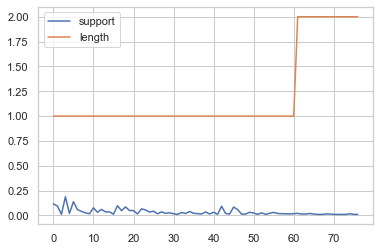

In [20]:
frequent_itemsets_fp.plot()

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

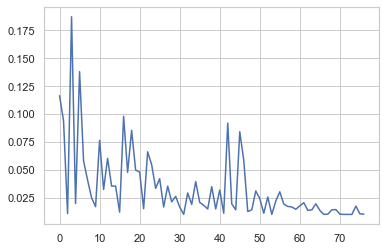

In [21]:
frequent_itemsets_fp['support'].plot()

## Apriori Algorithm 

In [22]:
from mlxtend.frequent_patterns import apriori

apriori(df_freq, min_support=0.01,use_colnames=True)

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.021293,(UHT-milk)
1,0.047973,(beef)
2,0.030272,(berries)
3,0.017188,(beverages)
4,0.049769,(bottled beer)
...,...,...
72,0.010005,"(sausage, soda)"
73,0.017445,"(whole milk, sausage)"
74,0.014110,"(whole milk, soda)"
75,0.014110,"(whole milk, tropical fruit)"


### Analyze of Apriori Results

In [23]:
frequent_itemsets_apriori = apriori(df_freq, min_support=0.01, use_colnames=True)
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))
frequent_itemsets_apriori

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.021293,(UHT-milk),1
1,0.047973,(beef),1
2,0.030272,(berries),1
3,0.017188,(beverages),1
4,0.049769,(bottled beer),1
...,...,...,...
72,0.010005,"(sausage, soda)",2
73,0.017445,"(whole milk, sausage)",2
74,0.014110,"(whole milk, soda)",2
75,0.014110,"(whole milk, tropical fruit)",2


In [24]:
frequent_itemsets_apriori[(frequent_itemsets_apriori['length'] == 2) & (frequent_itemsets_apriori['support'] >= 0.015)]

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
69,0.019497,"(other vegetables, whole milk)",2
70,0.020523,"(whole milk, rolls/buns)",2
73,0.017445,"(whole milk, sausage)",2


C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

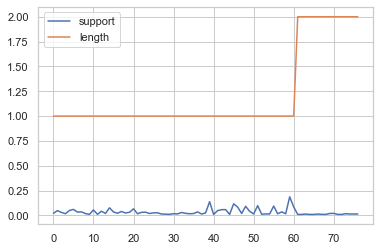

In [25]:
frequent_itemsets_apriori.plot()

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

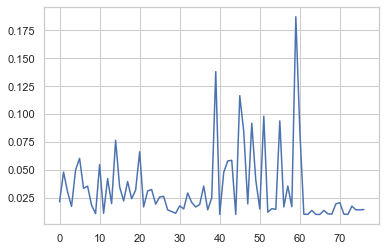

In [26]:
frequent_itemsets_apriori['support'].plot()

## Conclusion 

In this work, we used a dataset that shows the date of receipt of the products and the recipient. Our goal was finding the frequent patterns with min_support 0.01 value. I visualized the data and presented its features in graphs
I converted the data into model insertable and used it in both algorithms. <br>

In the last part there were 2 main frequent pattern algorithms, FP-growth and Apriori <br> <br>
FP-growth --> The frequent-pattern tree (FP-tree) is a compact data structure that stores quantitative information about frequent patterns in a database. Each transaction is read and then mapped onto a path in the FP-tree. This is done until all transactions have been read. Different transactions with common subsets allow the tree to remain compact because their paths overlap. <br> <br>
Apriori --> Apriori algorithm is using for finding frequent itemsets in a dataset for boolean association rule. Name of the algorithm is Apriori because it uses prior knowledge of frequent itemset properties. We apply an iterative approach or level-wise search where k-frequent itemsets are used to find k+1 itemsets. <br> <br>
FP-Growth was faster than Apriori. It is very fast algorithm compared to Apriori. Because in Apriori runtime increases exponentially. FP-growth requires less memory space, too. But as a result, their outputs are same, only indexes were not in same order. We can say that both algorithms are giving correct and usable results.

## References

1) https://towardsdatascience.com/frequent-pattern-mining-association-and-correlations-8fa9f80c22ef <br>
2) https://www.geeksforgeeks.org/apriori-algorithm/ <br>
3) https://www.geeksforgeeks.org/ml-frequent-pattern-growth-algorithm/ <br>
4) https://www.section.io/engineering-education/introduction-to-frequent-itemset-mining-with-python/ <br>
5) http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ <br>
6) http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/ <br>
7) http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/